/Users/nickvazz/miniconda3/envs/drlnd/lib/python3.6/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


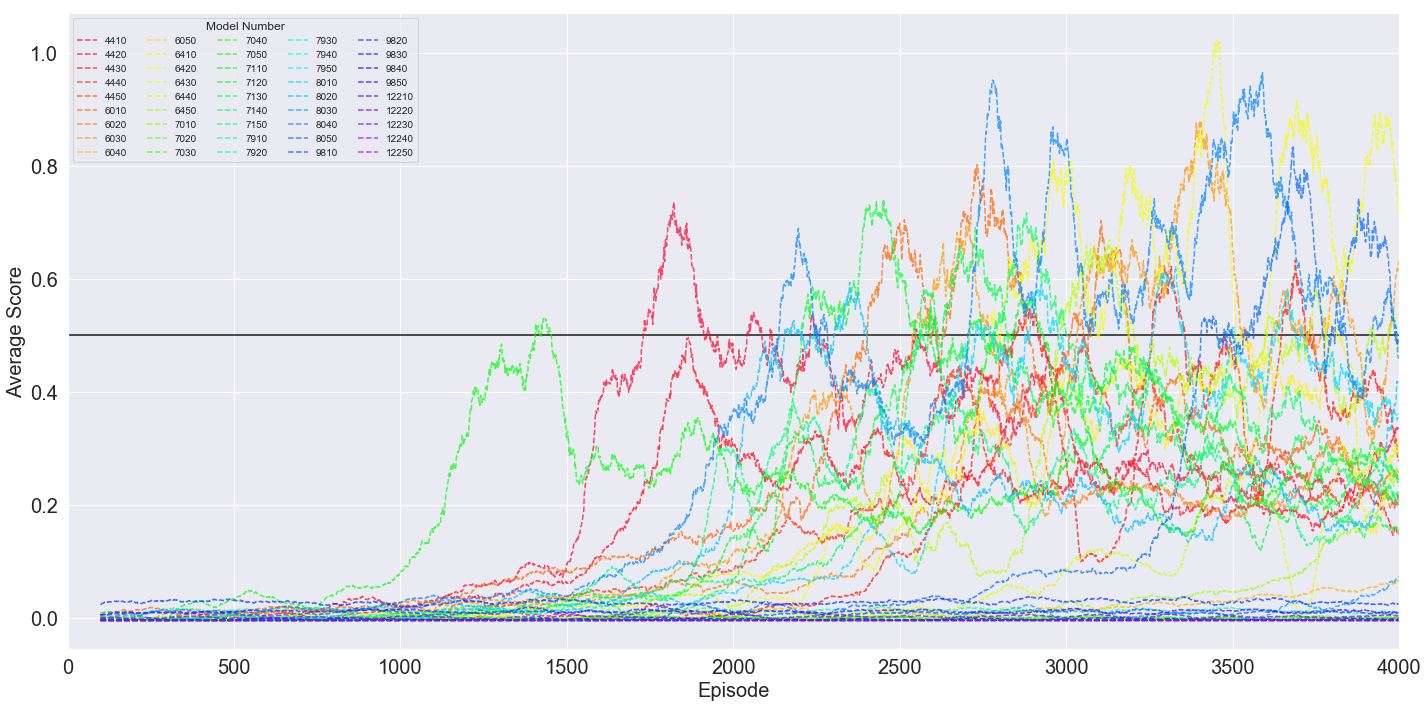

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
sns.set()
import json
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes', labelsize=20) 

result_values = 'results'
# result_values = 'results-tennis'


params = !ls {result_values}/*/*.json
scores = !find {result_values}/*/*.csv


dfs = []
for file in scores:
    name = file.split('/')[1].split('-')[1]
    df = pd.read_csv(file)
    if name[0] == '2':
        continue
    df['trial'] = int(name)
    dfs.append(df)
    
df = pd.concat(dfs)
means = df.groupby('trial')['score','episode'].rolling(100).mean().reset_index()

fig, ax = plt.subplots(1, figsize=(20,10))

cmap = plt.cm.gist_rainbow

ax.set_color_cycle([cmap(i) for i in np.linspace(0, 1, len(scores))])
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_prop_cycle.html

winning_iteration = []
for idx, group in enumerate(means.groupby('trial')):
    group[1].plot(x='level_1', y='score',ax=ax, label=group[0], linestyle='--', alpha=0.7)
    try:
        winning_iteration.append([group[0], group[1][group[1]['score'] > 0.5]['level_1'].iloc[0]])
    except:
        winning_iteration.append([group[0],np.nan])

winning_iteration = pd.DataFrame(winning_iteration, columns=['model_num', 'win_iter'])

legend = plt.legend(title="Model Number", ncol=5, fontsize='small', fancybox=True)
plt.hlines(0.5, 0, 4001)
plt.xlim(0,4001)
# plt.ylim(0,18)
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.tight_layout()
plt.savefig(f'{result_values}.png')
plt.show()

In [6]:
winning_ave = winning_iteration.copy()

winning_ave['model'] = [int(str(x)[:-2]) for x in winning_ave['model_num']]
# print (winning_ave.groupby('model')['win_iter'].mean().sort_values())
descriptions = winning_ave.groupby('model')['win_iter'].describe().sort_values('mean')
descriptions.drop('count',axis=1, inplace=True)
descriptions['std'] = descriptions['std'].round(2)
print (descriptions)
descriptions.to_csv(f'{result_values}-seed-best.csv')

              mean     std     min      25%     50%      75%     max
model                                                               
71     2183.500000  544.68  1406.0  2006.00  2382.5  2560.00  2563.0
44     2286.500000  787.01  1730.0  2008.25  2286.5  2564.75  2843.0
60     2471.000000   94.75  2404.0  2437.50  2471.0  2504.50  2538.0
80     2606.500000  599.13  2138.0  2150.00  2441.5  2898.00  3405.0
64     3090.333333  388.44  2769.0  2874.50  2980.0  3251.00  3522.0
70             NaN     NaN     NaN      NaN     NaN      NaN     NaN
79             NaN     NaN     NaN      NaN     NaN      NaN     NaN
98             NaN     NaN     NaN      NaN     NaN      NaN     NaN
122            NaN     NaN     NaN      NaN     NaN      NaN     NaN


In [7]:
df_params = []
for p in params:
    with open(p, 'r') as f:
        temp_df = pd.DataFrame(json.load(f), index=[0])
        temp_df['model'] = p.split('/')[1]
        df_params.append(temp_df)
        
        
df_params = pd.concat(df_params)
df_params['model_num'] = df_params['model_num'].astype(int)
df_params['GAMMA'] = df_params['GAMMA'].astype(float)



data = pd.merge(df_params, winning_iteration, on='model_num')
skip_cols = []
for col in data.columns:
    if len(data[col].unique()) == 1:
        skip_cols.append(col)
        

print (len(data))
skip_cols = ['TAU','BUFFER_SIZE','BATCH_SIZE','CRITIC_WEIGHT_DECAY', 'max_t', 'n_episodes']
data = data.drop(skip_cols + ['model_num'], axis=1)
data.set_index('model', inplace=True)

data = data.sort_values('win_iter')

for col in data.columns[:-1]:
    print (data.head(5)[col].value_counts())
    
data.head()

45
0.97    3
0.99    2
Name: GAMMA, dtype: int64
0.0001    5
Name: LR_ACTOR, dtype: int64
0.0001    5
Name: LR_CRITIC, dtype: int64
100    3
400    2
Name: fc1_units, dtype: int64
200    3
400    2
Name: fc2_units, dtype: int64
20    2
10    2
40    1
Name: seed, dtype: int64


,GAMMA,LR_ACTOR,LR_CRITIC,fc1_units,fc2_units,seed,win_iter
model,,,,,,,
model-7110,0.97,0.0001,0.0001,400,400,10,1406.0
model-4410,0.97,0.0001,0.0001,100,200,10,1730.0
model-8040,0.99,0.0001,0.0001,100,200,40,2138.0
model-8020,0.99,0.0001,0.0001,100,200,20,2154.0
model-7120,0.97,0.0001,0.0001,400,400,20,2206.0


In [8]:
data.to_csv(f'{result_values}.csv')

In [ ]:
# nums = map(lambda x: x.split('-')[1], data.index.values)

# new_nums = list(map(lambda x: int(x[:3]), nums))
# for idx, num in enumerate(new_nums):
#     if str(num)[0] == '9':
#         new_nums[idx] = int(str(num)[:2])
        

# stuff = np.array(zip(new_nums, data.win_iter))
# plt.scatter(stuff[:,1], stuff[:,0])
# print (stuff)

In [ ]:
1e-4
